In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os




Using TensorFlow backend.


In [13]:
df = pd.read_csv('PTF.csv')
df.head()

#Here the data is reshaped
df = df['Şimdi'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]


dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)


scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

x_train, y_train = create_dataset(dataset_train)
x_train[:1]

x_test, y_test = create_dataset(dataset_test)
x_test[:1]

# Reshape features for LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))


model.compile(loss='mean_squared_error', optimizer='Adam', metrics = ['accuracy'] ) 
model.fit(x_train, y_train, epochs=10, batch_size=64)



predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)



(4943, 1)
(3954, 1)
(1039, 1)
Epoch 1/10
3904/3904 [==============================] - 20s 5ms/step - loss: 0.0138 - accuracy: 5.1230e-04
Epoch 2/10
3904/3904 [==============================] - 19s 5ms/step - loss: 0.0034 - accuracy: 5.1230e-04
Epoch 3/10
3904/3904 [==============================] - 18s 5ms/step - loss: 0.0030 - accuracy: 5.1230e-04
Epoch 4/10
3904/3904 [==============================] - 19s 5ms/step - loss: 0.0024 - accuracy: 5.1230e-04
Epoch 5/10
3904/3904 [==============================] - 18s 5ms/step - loss: 0.0026 - accuracy: 5.1230e-04
Epoch 6/10
3904/3904 [==============================] - 18s 5ms/step - loss: 0.0024 - accuracy: 5.1230e-04
Epoch 7/10
3904/3904 [==============================] - 18s 5ms/step - loss: 0.0022 - accuracy: 5.1230e-04
Epoch 8/10
3904/3904 [==============================] - 18s 5ms/step - loss: 0.0022 - accuracy: 5.1230e-04
Epoch 9/10
3904/3904 [==============================] - 18s 5ms/step - loss: 0.0020 - accuracy: 5.1230e-04
Epoch 1

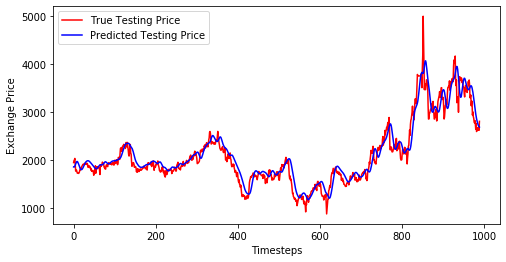

In [3]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.xlabel('Timesteps')
plt.ylabel('Exchange Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()


In [36]:
model.compile(loss='mean_squared_logarithmic_error', optimizer='Adam', metrics = ['accuracy'])

In [4]:
df = pd.read_csv('PTF.csv')

In [5]:
df.describe()

,Şimdi
count,4943.000000
mean,2704.200283
std,853.515378
min,877.080000
25%,2045.325000
50%,2582.640000
75%,3154.025000
max,5272.130000


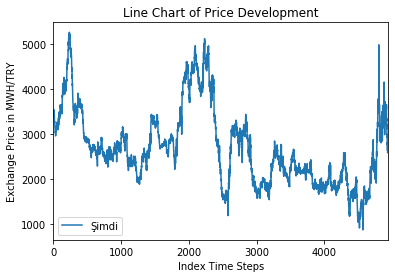

In [15]:
df = pd.read_csv('PTF.csv')

df.plot(kind='line')
plt.xlabel('Index Time Steps')
plt.title('Line Chart of Price Development')
plt.ylabel('Exchange Price in MWH/TRY')
plt.show()

In [ ]:
df.cov()
df.corr()
df.describe()
df.skew()
df.kurtosis()
df.mean()
df.min()
df.std()
df.max()


In [ ]:
model.summary()

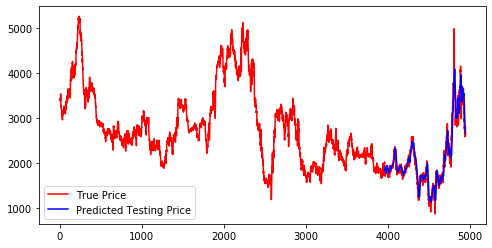

In [12]:
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
plt.title('The Results')
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

In [11]:
if(not os.path.exists('stock_prediction.h5')):
  
    model.save('stock_prediction.h5')
    
model = load_model('stock_prediction.h5')

In [10]:
import numpy 
numpy.savetxt('neuralnetwork.csv', predictions, delimiter = ',')

df_x = pd.read('neuralnetwork.csv')



AttributeError: module 'pandas' has no attribute 'read'